# Nonlinear Optimization
## A Production Application: Par, Inc. Revisited
In formulating the linear programming model for the Par, Inc. problem, we assumed that the company could sell all of the standard and deluxe bags it could produce. However, depending on the price of the golf bags, this assumption may not hold. An inverse relationship usually exists between price and demand. As price increases, the quantity demanded decreases.

- Let $P_S$ denote the price Par, Inc. charges for each standard bag and
- Let $P_D$ denote the price for each deluxe bag.

Assume that the demand for standard bags, $S$, and the demand for deluxe bags, $D$, are given by
- $S = 2,250 - 15P_S$
- $D = 1,500 - 5P_D$

The revenue generated from producing the bags depends on their costs. If
- The cost to produce a standard bag is \\$70, and
- The cost to produce a deluxe bag is \\$150

then

- The cost to produce $S$ standard bags is $70S$, and
- The cost to produce $D$ deluxe bags is $150D$


then, the profit contribution for each type of bag is (revenue - cost)
- $P_S S - 70S = (P_S - 70)S$ 
- $P_D D - 150D = (P_D - 150)D$ 

and since
- $S = 2,250 - 15P_S \implies P_S = 150 - \frac{1}{15}S$, and
- $D = 1,500 - 5P_D \implies P_D = 300 - \frac{1}{5}D$

thus the profit contribution:
- of standard bag is $(P_S - 70)S = (150 - \frac{1}{15}S - 70)S = 80S - \frac{1}{15}S^2 $, and
- of deluxe bag is $(P_D - 150)D = (300 - \frac{1}{5}D - 150)D = 150D - \frac{1}{5}D^2 $

$\therefore$ the total profit contribution $=80S - \frac{1}{15}S^2 + 150D - \frac{1}{5}D^2$

## The Objective Function
<center>$\max( 80S - \frac{1}{15} S^2 + 150D - \frac{1}{5}D^2)$</center>
### The Par, Inc. Constrained Nonlinear Maximization Problem

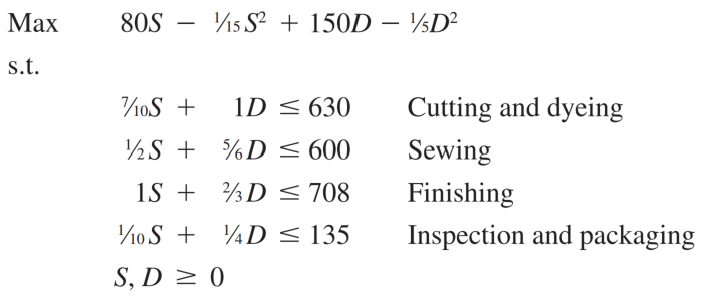

This maximization problem is exactly the same as the Par, Inc. problem we saw earlier except for the nonlinear objective function. 

## Geometry of the Objective Function

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(0, 1200, 30)
Y = np.linspace(0, 1200, 30)
X, Y = np.meshgrid(X, Y)
Z = 80*X - (1/15.)*X**2 + 150*Y - (1/5.)*Y**2
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

### Geometry of the Feasible Region
#### Unconstrained Optimum
The feasible region for the original Par, Inc. problem, along with the unconstrained optimal solution point (600, 375), is shown in the figure below. The unconstrained optimum of (600, 375) is obviously outside the feasible region.

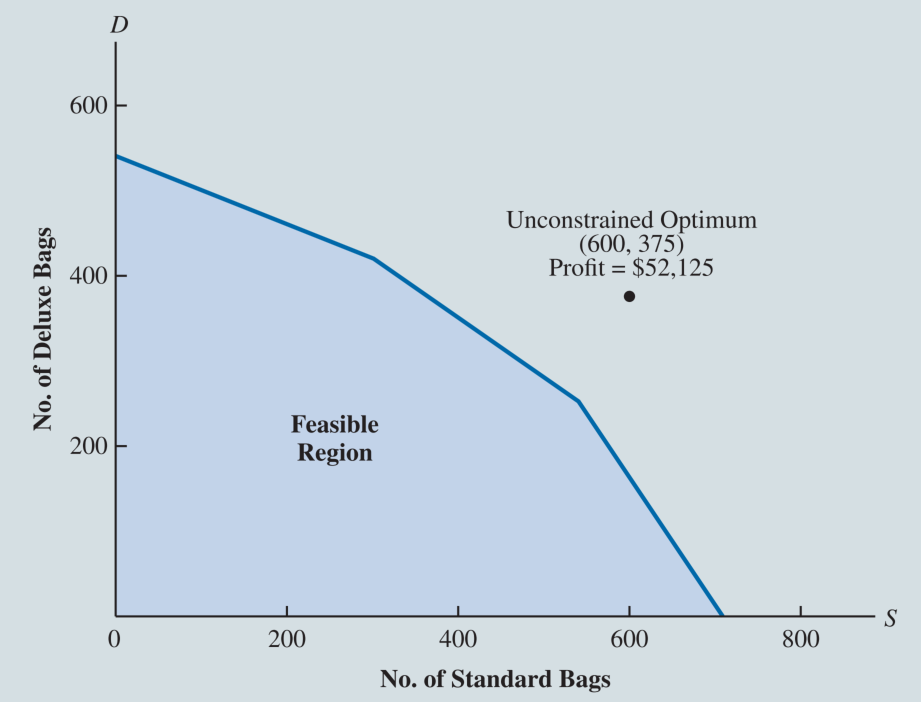

### Optimal Solution in Feasible Region
This maximization problem is exactly the same as the Par, Inc. problem we saw earlier except for the nonlinear objective function. The solution to this new constrained nonlinear maximization problem is shown in the figure below.

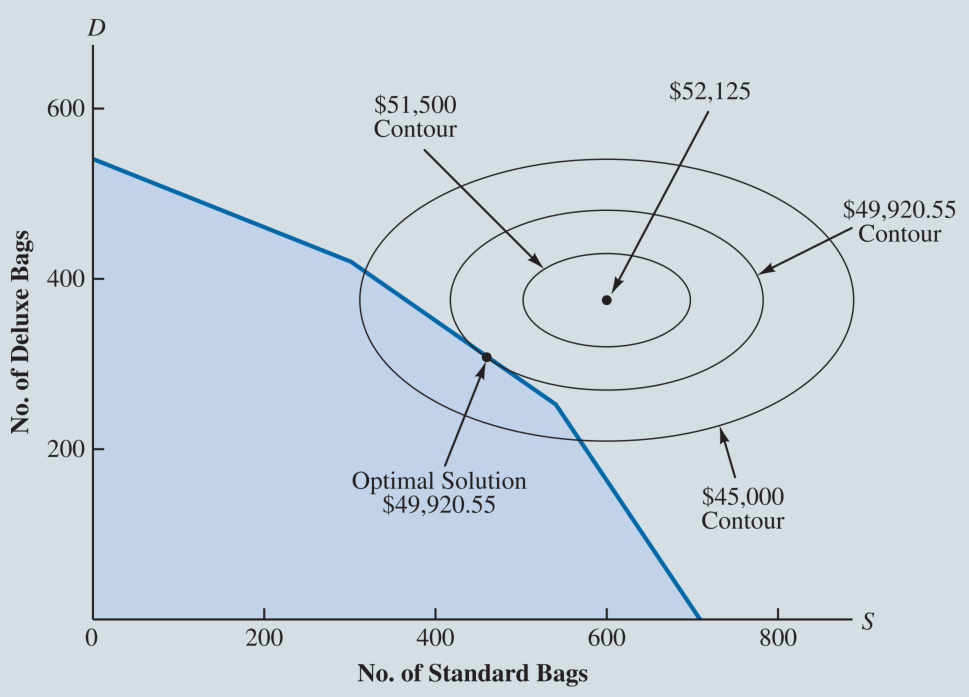

The contour lines show profit contributions of \\$45,000, \\$49,920.55, and \\$51,500.

- Because part of the \\$45,000 profit contour line cuts through the feasible region, we know that an infinite number of combinations of standard and deluxe bags will yield a profit of \\$45,000.
- An infinite number of combinations of standard and deluxe bags also provide a profit of \\$51,500. However, none of the points on the \\$51,500 contour profit line is in the feasible region. 

<blockquote>As the contour lines move farther out from the unconstrained optimum of (600, 375) the profit contribution associated with each contour line decreases.</blockquote>

#### The contour line representing a profit of $49,920.55 intersects the feasible region at a single point. THE MAXIMUM POSSIBLE PROFIT.

## Solving Nonlinear Optimization Models
### Define the Objective Function and Constraints (Lambda Expression)
#### The Objective Function
$80S - \frac{1}{15} S^2 + 150D - \frac{1}{5}D^2$

In [ ]:
# x = [S,D], so x[0] corresponds to S and x[1] corresponds to D
obj = lambda x: 80*x[0]-x[0]*x[0]/15.+150*x[1]-x[1]*x[1]/5.

#### Constraint 1: Cutting and Dyeing
Write the constraints in the form $g(x) \geq 0$
<p style="text-align: center;">$\frac{7}{10}S + 1D \leq 630$</p>
<center>$630 - D - \frac{7}{10}S \geq 0$</center>

In [ ]:
con1 = lambda x: 630 - x[1] - (7./10.) * x[0]

#### Constraint 2: Sewing
<p style="text-align: center;">$\frac{1}{2}S + \frac{5}{6}D \leq 600$</p>
<center>$600 - \frac{1}{2}S - \frac{5}{6}D \geq 0$</center>

<p style="color:red;">Write the Lambda expression for Constraint 2</p>

#### Constraint 3: Finishing
<p style="text-align: center;">$1S + \frac{2}{3}D \leq 708$</p>
<center>$708 - S - \frac{2}{3}D \geq 0$</center>
<p style="color:red;">Write the Lambda expression for Constraint 3</p>

#### Constraint 4: Inspection
<p style="text-align: center;">$\frac{1}{10}S + \frac{1}{4}D \leq 135$</p>
<center>$135 - \frac{1}{10}S - \frac{1}{4}D \geq 0$</center>
<p style="color:red;">Write the Lambda expression for Constraint 4</p>

#### Constraints 5 & 6: Nonnegativity Constraints
<center>$S, D \geq 0$</center>

In [ ]:
con5 = lambda x: x[0]
con6 = lambda x: x[1]

##### Import the 'minimize' library from 'scipy.optimize'
<p style="color:red;">Since this is a maximixation problem, why are we importing the 'minimize' package?</p>
<blockquote>We can use the 'minimize' package to <b>maximize</b> our objective function by passing it the <b>negative</b> of the objective function</blockquote>

In [ ]:
from scipy.optimize import minimize
import numpy as np

##### For nonlinear optimization problems, we need to provide the algorithm with an initial guess

In [ ]:
s, d = 2, 2 # initial guess
x0 = [s, d]

##### Prepare the constraints for the algorithm

In [ ]:
con1Type = {'type':'ineq', 'fun': con1}
con2Type = {'type':'ineq', 'fun': con2}
con3Type = {'type':'ineq', 'fun': con3}
con4Type = {'type':'ineq', 'fun': con4}
con5Type = {'type':'ineq', 'fun': con5}
con6Type = {'type':'ineq', 'fun': con6}
cons = [con1Type, con2Type, con3Type, con4Type, con5Type, con6Type]

##### The Complete Code

In [ ]:
from scipy.optimize import minimize
import numpy as np
obj = lambda x: 80*x[0]-x[0]*x[0]/15.+150*x[1]-x[1]*x[1]/5.
con1 = lambda x: 630 - x[1] - (7./10.) * x[0]
con2 = lambda x: 600 - x[0]/2 - (5./6.)*x[1]
con3 = lambda x: 708 - x[0] - (2./3.) * x[1]
con4 = lambda x: 135 - (x[0]/10.) - (x[1]/4.)
con5 = lambda x: x[0]
con6 = lambda x: x[1]
con1Type = {'type':'ineq', 'fun': con1}
con2Type = {'type':'ineq', 'fun': con2}
con3Type = {'type':'ineq', 'fun': con3}
con4Type = {'type':'ineq', 'fun': con4}
con5Type = {'type':'ineq', 'fun': con5}
con6Type = {'type':'ineq', 'fun': con6}
cons = [con1Type, con2Type, con3Type, con4Type, con5Type, con6Type]
res = minimize(lambda x: -obj(x), x0=[1., 1.], constraints=cons)
print res
print '\n\nProfit $', '{:.2f}'.format(-res.fun),\
'when manufacturing', '{:.0f}'.format(round(res.x[0])), 'standard bags'\
'and', '{:.0f}'.format(round(res.x[1])), 'deluxe bags'

In [ ]:
print res.x
print 'Hours remaining for resources:'
print 'Of 630 hours for Cutting and Dyeing, hours remaining' , '{:.2f}'.format(con1(res.x))
print 'Of 600 hours for Sewing, hours remaining:' , '{:.2f}'.format(con2(res.x))
print 'Of 708 horus for Finishing,, hours remaining:' , '{:.2f}'.format(con3(res.x))
print 'Of 135 hours for Inspection and Packaging, hours remaining' , '{:.2f}'.format(con4(res.x))


## Unconstrained Optimum
<p style="color:red;">Run the minimize() function without Constraints</p>

In [ ]:
res = # replace this text with the call to minimize with no constratints
print res 
print '\n\nOptimum Profit $', '{:.2f}'.format(-res.fun),\
'when manufacturing', '{:.0f}'.format(round(res.x[0])), 'standard bags'\
'and', '{:.0f}'.format(round(res.x[1])), 'deluxe bags'

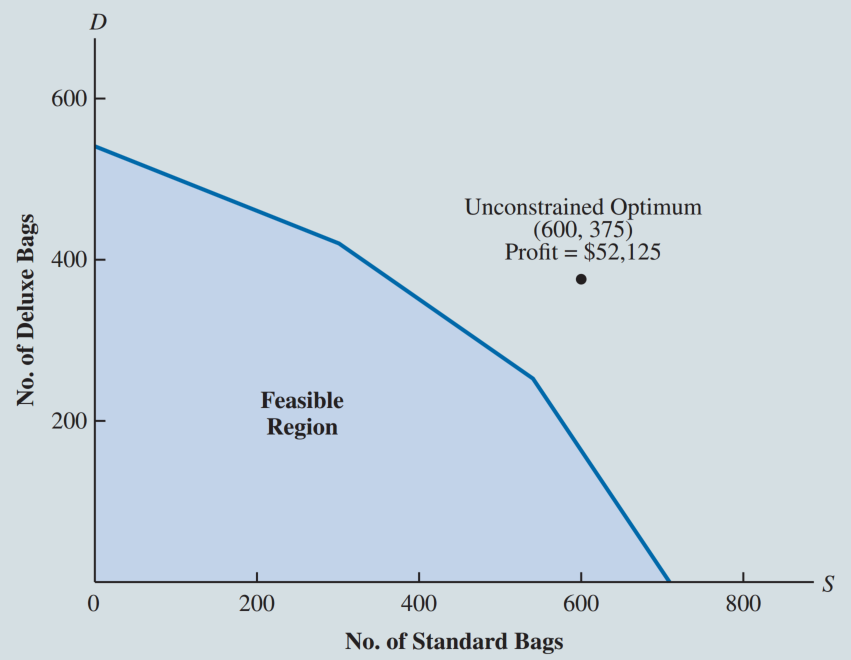

# Local and Global Optima
## Concave Functions
Consider the function $f(X,Y) = -X^2 - Y^2$ The shape of this function is illustrated in the following figure. A function that is bowl-shaped down is called a **concave function**. 

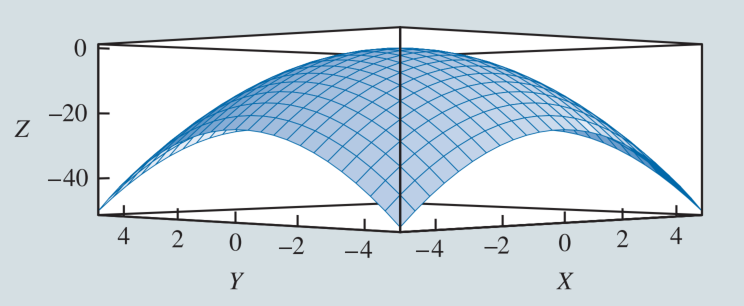

The maximum value for this particular function is 0, and the point (0, 0) gives the optimal value of 0. The point (0, 0) is a local maximum; but it is also a global maximum because no point gives a larger function value.

In other words, no values of X and Y result in an objective function value greater than 0. Functions that are concave, such as $f(X,Y) = -X^2 - Y^2$, have a single local maximum that is also a global maximum.

<blockquote>This type of nonlinear problem is relatively easy to maximize.</blockquote>


## Convex Functions
Consider the function $f(X,Y) = +X^2 + Y^2$. The shape of this function is illustrated in Figure 14.6. It is bowl-shaped up and called a convex function.

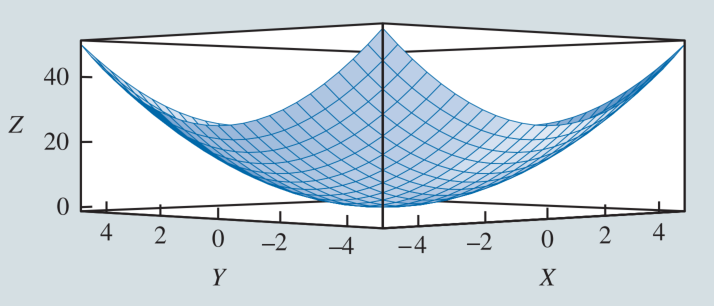

minimum value for this particular function is 0, and the point (0, 0) gives the minimum value of 0. The point (0, 0) is a local minimum and a global minimum because no values of X and Y give an objective function value less than 0. Convex functions, such as $f(X,Y) = +X^2 + Y^2$, have a single local minimum and are relatively easy to minimize.

## Local vs. Global Optima
Consider the objective function:
<center>$f(X,Y) = X \sin(5 \pi X) + Y \sin(5 \pi Y)$</center>
in the feasible regions $0 \leq X \leq 1, 0 \leq Y \leq 1$

Let us model it in Python and find the optima:

In [ ]:
from scipy.optimize import minimize
import numpy as np
import math
obj = lambda x: x[0] * math.sin(5 * math.pi * x[0]) + x[1] * math.sin(5 * math.pi * x[1])

##### Let us compute the optimal maximam with starting point (1,1)

In [ ]:
res = minimize(lambda x: -obj(x), x0=[1., 1.])
print res.x, (-res.fun)

##### Now let us repeat the same process, compute the optimal maximum, with starting point (2,2)
<p style="color:red;">Write the code to run the optimization algorithm starting from (2,2)</p>

##### Let us see the potimal maximum with different starting points
- (0.01, 0.01)
- (1, 0)
- (0, 1)
- (0.5, 0.5)
- (1, 1)

In [ ]:
res = # replace this line with appropriate code
print 'Start [0.01, 0.01] => X,Y', res.x, 'Optimal Value:', (-res.fun)
res = # replace this line with appropriate code
print 'Start [1.0, 0.0] => X,Y', res.x, 'Optimal Value:', (-res.fun)
res = # replace this line with appropriate code
print 'Start [0.0, 1.0] => X,Y', res.x, 'Optimal Value:', (-res.fun)
res = # replace this line with appropriate code
print 'Start [0.5, 0.5] => X,Y', res.x, 'Optimal Value:', (-res.fun)
res = # replace this line with appropriate code
print 'Start [1.0, 1.0] => X,Y', res.x, 'Optimal Value:', (-res.fun)

<p style="color:red; font-size:150%;">Why are we getting multiple optimal values???</p>

##### Let us Inspect the Geometry of the Objective Function

<p style="color:red;">Write the Python code to draw the objective function.</p>

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)

Z = # provide the objective function formula here
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

# A Location Problem
Let us consider the case of LaRosa Machine Shop (LMS). LMS is studying where to locate its tool bin facility on the shop floor. The locations of the five production stations appear in the figure below. In an attempt to be fair to the workers in each of the  production stations, management has decided to try to find the position of the tool bin that would minimize the sum of the distances from the tool bin to the five production stations. 

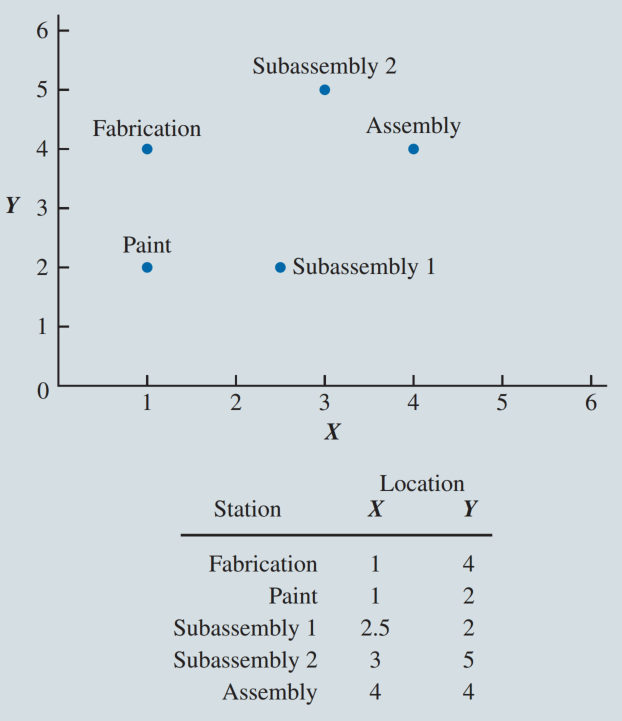

### Decision Variables
We define the following decision variables:
<center>$X=$ horizontal location of the tool bin</center>
<center>$Y=$ vertical location of the tool bin</center>

We may measure the distance from a station to the tool bin located at (X, Y) by using Euclidean (straight-line) distance. For example, the distance from fabrication located at the coordinates (1, 4) to the tool bin located at the coordinates (X, Y) is given by

<center>$\sqrt{(X-1)^2+(Y-4)^2}$</center>

<p style="color:red; font-size:150%;">Are there any constraints?</p>

### The Unconstrained Optimization Problem
<center>Min $\bigg(\sqrt{(X-1)^2+(Y-4)^2}+\sqrt{(X-1)^2+(Y-2)^2}+\sqrt{(X-2.5)^2+(Y-2)^2}$</center>
<center>$+\sqrt{(X-3)^2+(Y-5)^2}+\sqrt{(X-4)^2+(Y-4)^2}\bigg)$</center>

In [ ]:
from scipy.optimize import minimize
import math
obj = # write the objective function in Lambda expression
res = # replace with proper code
print 'Optimal Location is at:', res.x, 'units with optimal value of the objective function:', (res.fun)
print 'The tools bin is'
print '{:0.2f}'.format(math.sqrt((res.x[0]-1)**2 + (res.x[1]-4)**2)), 'units away from station 1 (Fabrication)'
print '{:0.2f}'.format(math.sqrt((res.x[0]-1)**2 + (res.x[1]-2)**2)), 'units away from station 2 (Paint)'
print '{:0.2f}'.format(math.sqrt((res.x[0]-2.5)**2 + (res.x[1]-2)**2)), 'units away from station 3 (Subassembly 1)'
print '{:0.2f}'.format(math.sqrt((res.x[0]-3)**2 + (res.x[1]-5)**2)), 'units away from station 4 (Subassembly 2)'
print '{:0.2f}'.format(math.sqrt((res.x[0]-4)**2 + (res.x[1]-4)**2)), 'units away from station 5 (Assembly)'